2. Trabalhar na análise descritiva do conjunto público de redações Essay-br;

In [1]:
from build_dataset import Corpus

c = Corpus()
corpus_shape = c.read_corpus().shape

train, valid, test = c.read_splits()
train_shape = train.shape

train_subset = train.loc[1:5, ['essay', 'score', 'competence']]

valid_shape = valid.shape
valid_subset = valid.loc[1:5, ['essay', 'score', 'competence']]

test_shape = test.shape
test_subset = test.loc[1:5, ['essay', 'score', 'competence']]


In [2]:
print(train.info())
print(valid.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   prompt      3198 non-null   int64 
 1   title       2724 non-null   object
 2   essay       3198 non-null   object
 3   competence  3198 non-null   object
 4   score       3198 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 125.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   prompt      686 non-null    int64 
 1   title       581 non-null    object
 2   essay       686 non-null    object
 3   competence  686 non-null    object
 4   score       686 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 5 columns):
 #   Column  

In [3]:
import pandas as pd

def expand_competence_column(df):
    competence_expanded = pd.DataFrame(df['competence'].to_list(), columns=['portuguese', 'topic_genre', 'coherence', 'cohesion', 'intervention_proposal'])
    df_expanded = pd.concat([df, competence_expanded], axis=1)
    df_expanded = df_expanded.drop('competence', axis=1)
    return df_expanded

# Expanda a coluna 'competence' para 'train', 'valid' e 'test'
train_expanded = expand_competence_column(train)
valid_expanded = expand_competence_column(valid)
test_expanded = expand_competence_column(test)

# Exiba os DataFrames expandidos
print("Train:")
print(train_expanded.head())
print("")

print("\nValid:")
print(valid_expanded.head())
print("")

print("\nTest:")
print(test_expanded.head())
print("")

Train:
   prompt                                              title  \
0      60                             Reforma da previdência   
1      51                          ANALFABETISMO E SOCIEDADE   
2      73  Caminhos para superar os desafios encontrados ...   
3      51     Analfabetismo funcional no Brasil tem solução.   
4      59                                                NaN   

                                               essay  score  portuguese  \
0  [É notório que a reforma da previdência no Bra...    440         120   
1  [Pode -se afirmar que a presença dos Jesuítas,...    480         120   
2  [Em 13 de maio de 1888 veio ao Brasil a lei da...    440         120   
3  [“Uma sociedade só progride quando um se mobil...    640         120   
4  [Nas últimas décadas, o Brasil vem enfrentando...    560         120   

   topic_genre  coherence  cohesion  intervention_proposal  
0           80         80       120                     40  
1          120         80        80

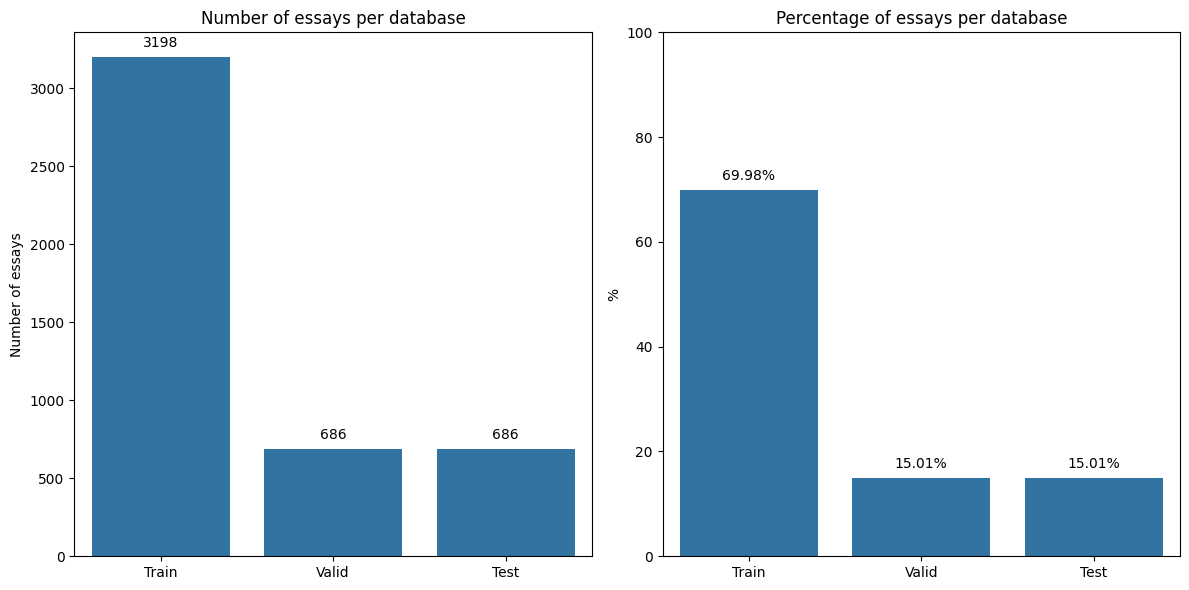

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenha os tamanhos dos DataFrames
sizes = [len(train), len(valid), len(test)]
labels = ['Train', 'Valid', 'Test']

# Crie o gráfico de barras para o tamanho absoluto
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=labels, y=sizes)
plt.title('Number of essays per database')
plt.ylabel('Number of essays')

# Adicione os valores absolutos no topo das barras
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Crie o gráfico de barras para a distribuição percentual
percentages = [size / sum(sizes) * 100 for size in sizes]
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=labels, y=percentages)
plt.title('Percentage of essays per database')
plt.ylabel('%')
plt.ylim(0, 100)

# Adicione os valores absolutos no topo das barras
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

In [5]:
# Count the unique prompts in each dataset
train_prompts_count = train['prompt'].nunique()
valid_prompts_count = valid['prompt'].nunique()
test_prompts_count = test['prompt'].nunique()

print(f'Number of unique prompts in the training set: {train_prompts_count}')
print(f'Number of unique prompts in the validation set: {valid_prompts_count}')
print(f'Number of unique prompts in the test set: {test_prompts_count}')

Number of unique prompts in the training set: 86
Number of unique prompts in the validation set: 85
Number of unique prompts in the test set: 86


In [6]:
df = pd.concat([train_expanded, valid_expanded, test_expanded], ignore_index=True)

1. **portuguese:** Adherence to the formal written norm of Portuguese.


2. **topic_genre:** Conform to the argumentative text genre and the proposed topic (prompt), to develop a text, using knowledge from different areas.


3. **coherence:** Select, relate, organize, and interpret data and arguments in defense of a point of view.


4. **cohesion:** Usage of argumentative linguistic structures.


5. **intervention_proposal:** Elaborate a proposal to solve the problem in question.


<Figure size 1000x600 with 0 Axes>

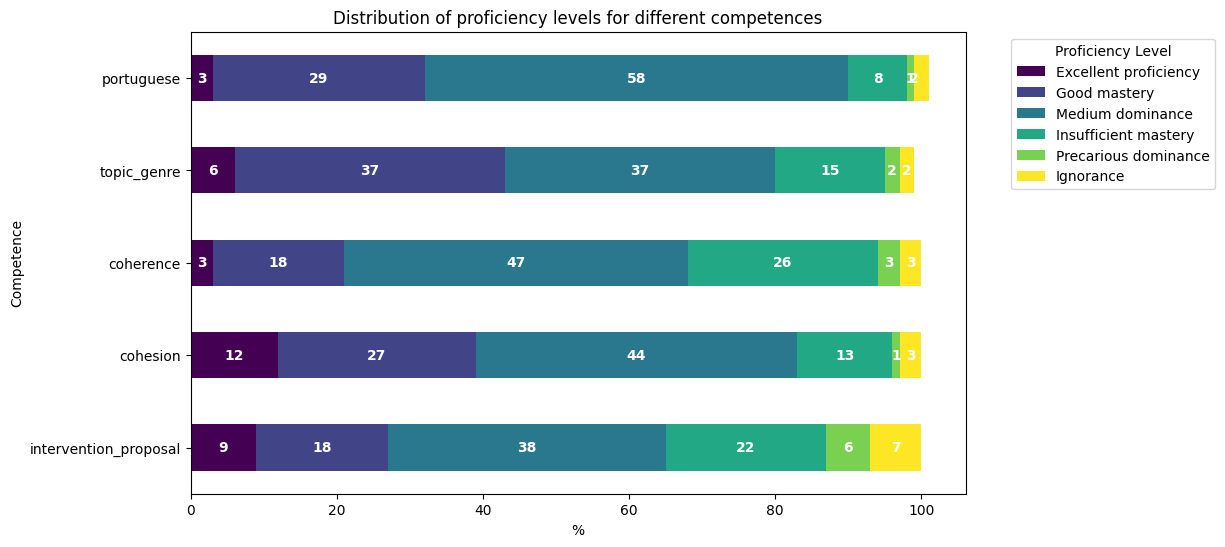

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento de valores para rótulos
label_mapping = {200: 'Excellent proficiency',
                 160: 'Good mastery',
                 120: 'Medium dominance',
                 80: 'Insufficient mastery',
                 40: 'Precarious dominance',
                 0: 'Ignorance'}

# Mapeamento inverso para ordem correta na legenda
inverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Competências a serem consideradas
competences = ['portuguese', 'topic_genre', 'coherence', 'cohesion', 'intervention_proposal']

# Inverta a ordem das competências
competences = competences[::-1]

# Crie o gráfico de barras horizontais empilhadas
plt.figure(figsize=(10, 6))

data = []

for competence in competences:
    competence_values = df[competence].apply(lambda x: label_mapping[x] if pd.notna(x) else None)
    competence_counts = competence_values.value_counts().reindex(inverse_label_mapping).fillna(0)
    competence_percentage = competence_counts / competence_counts.sum() * 100
    competence_percentage_rounded = competence_percentage.round().astype(int)
    data.append(competence_percentage_rounded)

df_plot = pd.DataFrame(data, index=competences)

ax = df_plot.plot(kind='barh', stacked=True, colormap='viridis', figsize=(10, 6))

# Adicione linhas verticais pontilhadas com transparência
# for i in range(10, 101, 10):
#     ax.axvline(x=i, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)

# Adicione os valores ao centro e em cima das barras empilhadas
for i, competence in enumerate(competences):
    x_positions = df_plot.iloc[i].cumsum() - df_plot.iloc[i] / 2
    for x, value in zip(x_positions, df_plot.iloc[i]):
        if value > 0:
            ax.text(min(x, 99), i, f'{round(value)}', color='white',
                    ha='center', va='center', fontsize=10, weight='bold')

plt.title('Distribution of proficiency levels for different competences')
plt.xlabel('%')
plt.ylabel('Competence')
plt.legend(title='Proficiency Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\k_tel\AppData\Local\Temp\ipykernel_26784\2542491621.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=competence_percentage_rounded.index, y=competence_percentage_rounded, palette='viridis', ax=ax)
C:\Users\k_tel\AppData\Local\Temp\ipykernel_26784\2542491621.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=competence_percentage_rounded.index, y=competence_percentage_rounded, palette='viridis', ax=ax)
C:\Users\k_tel\AppData\Local\Temp\ipykernel_26784\2542491621.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compete

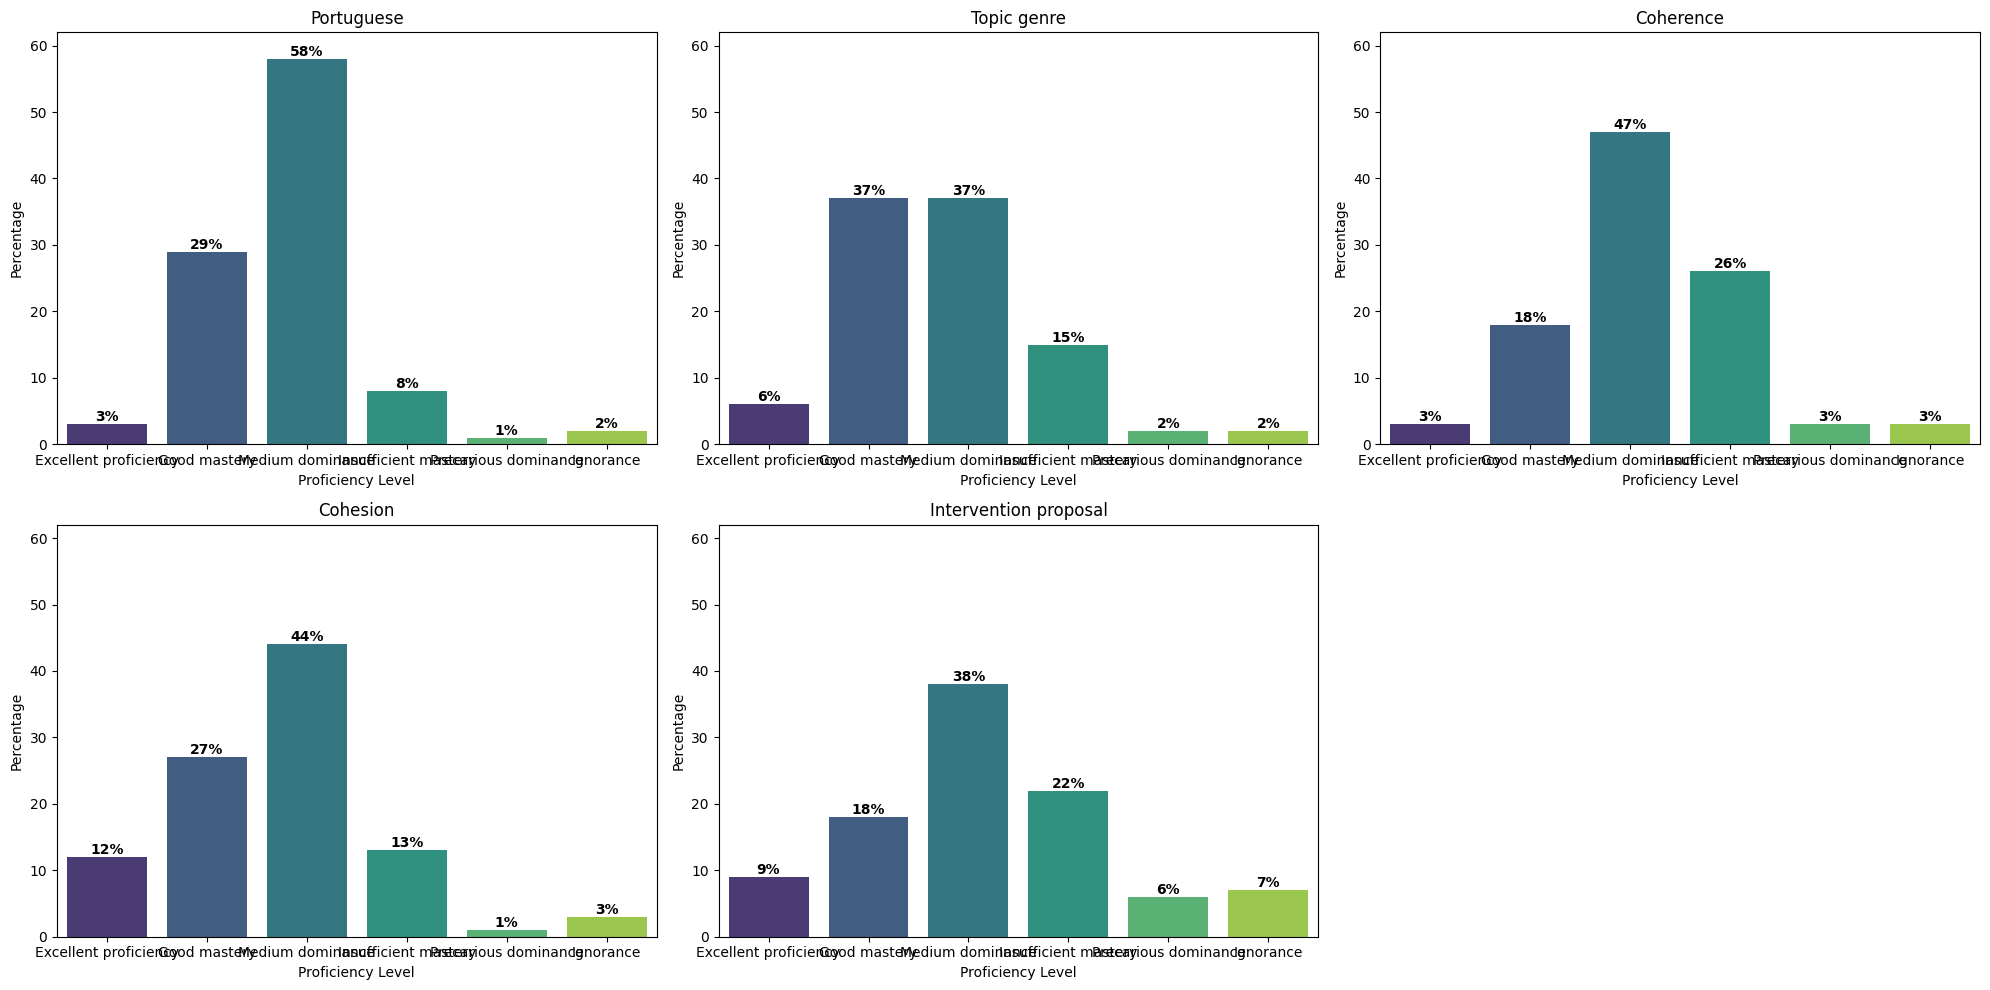

In [84]:
# Inverta a ordem das competências
competences = competences[::-1]

# Crie o gráfico de barras verticais para cada competência
plt.figure(figsize=(20, 10))

for i, competence in enumerate(competences):
    competence_values = df[competence].apply(lambda x: label_mapping[x] if pd.notna(x) else None)
    competence_counts = competence_values.value_counts().reindex(inverse_label_mapping).fillna(0)
    competence_percentage = competence_counts / competence_counts.sum() * 100
    competence_percentage_rounded = competence_percentage.round().astype(int)

    ax = plt.subplot(2, 3, i + 1)
    sns.barplot(x=competence_percentage_rounded.index, y=competence_percentage_rounded, palette='viridis', ax=ax)
    
    # Adicione os valores de porcentagem sobre as barras
    for j, value in enumerate(competence_percentage_rounded):
        ax.text(j, value, f'{value}%', ha='center', va='bottom', color='black', fontsize=10, weight='bold')
    
    ax.set_title(f'{competence.replace("_", " ").capitalize()}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Proficiency Level')

    # Defina o limite do eixo y para 0-62%
    ax.set_ylim(0, 62)

plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\k_tel\AppData\Local\Temp\ipykernel_26784\1550616609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prompt', y=competence, data=df, palette='viridis')
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\k_tel\AppData\Local\Temp\ipy

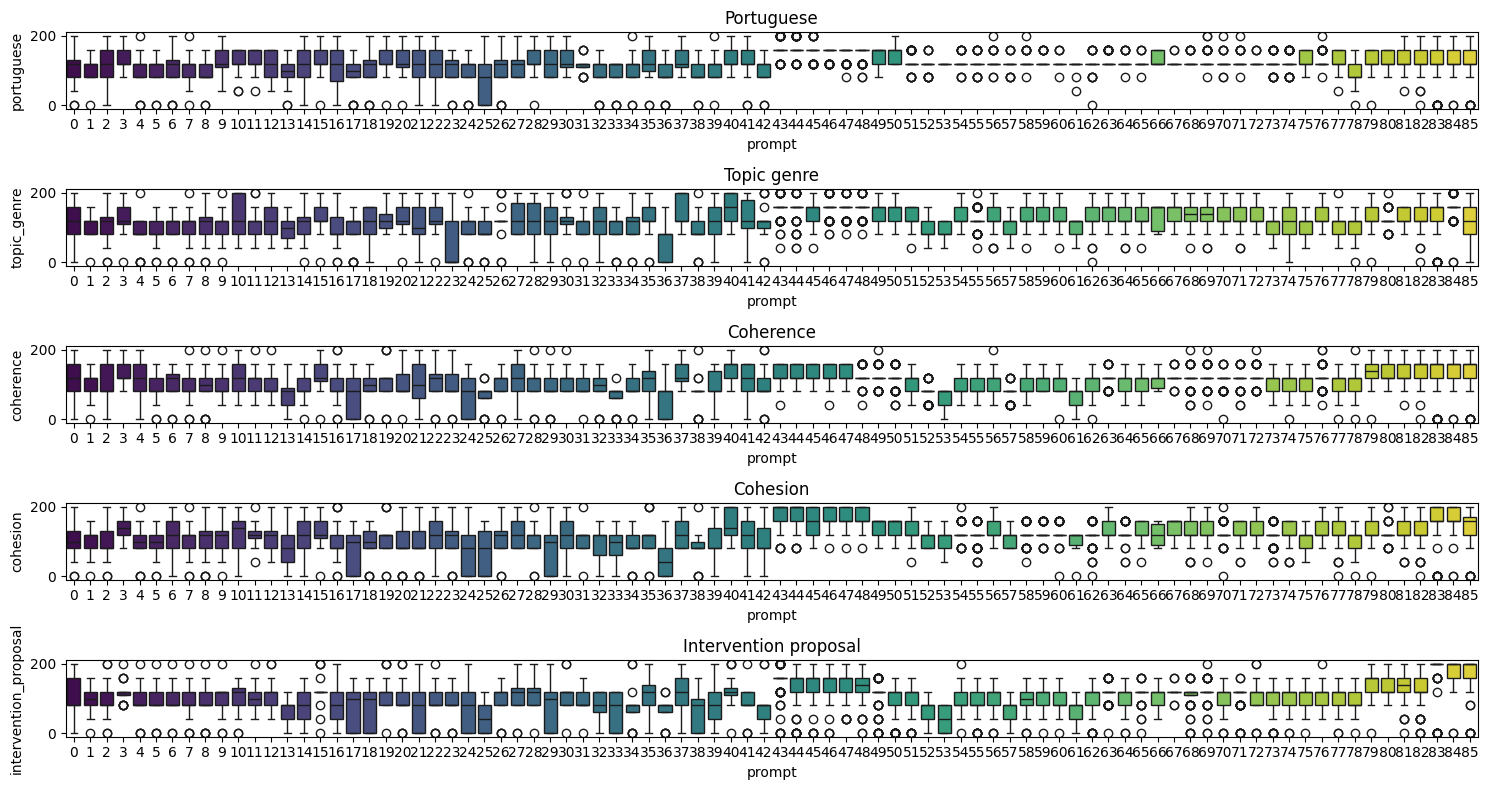

In [40]:
# Crie o boxplot para cada competência
plt.figure(figsize=(15, 8))

for i, competence in enumerate(competences):
    plt.subplot(5, 1, i + 1)
    sns.boxplot(x='prompt', y=competence, data=df, palette='viridis')
    plt.title(f'{competence.replace("_", " ").capitalize()}')

plt.tight_layout()
plt.show()

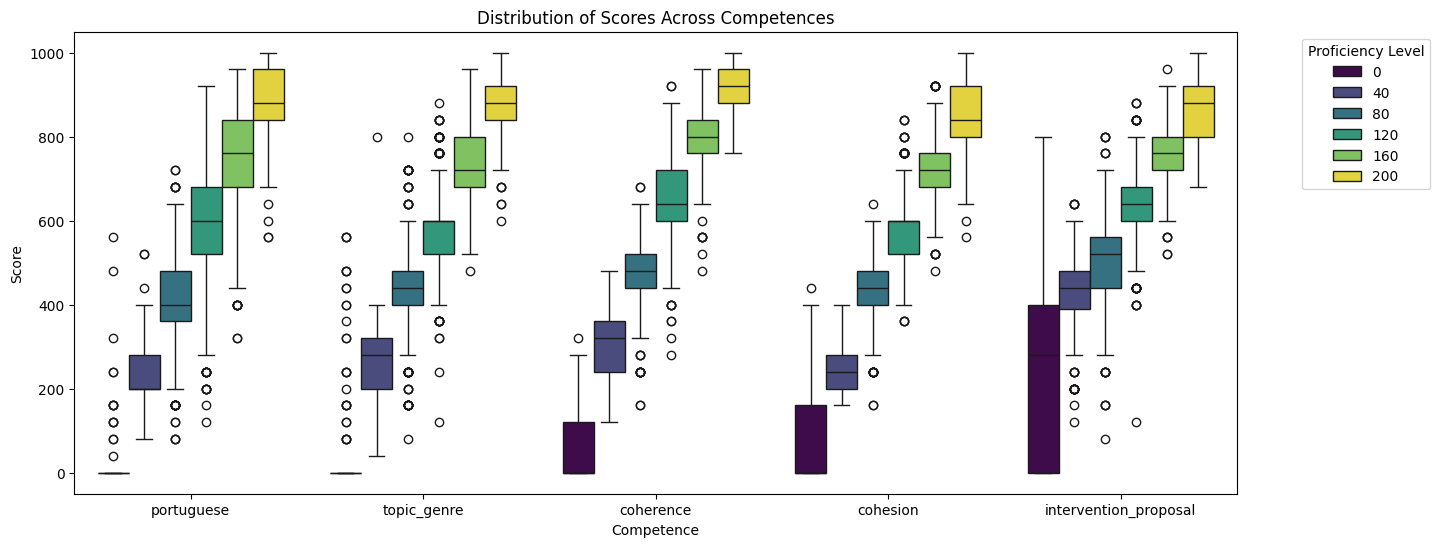

In [45]:
# Crie um boxplot para cada competência
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.melt(id_vars=['score'], value_vars=competences), x='variable', y='score', hue='value', palette='viridis')
plt.title('Distribution of Scores Across Competences')
plt.xlabel('Competence')
plt.ylabel('Score')
plt.legend(title='Proficiency Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

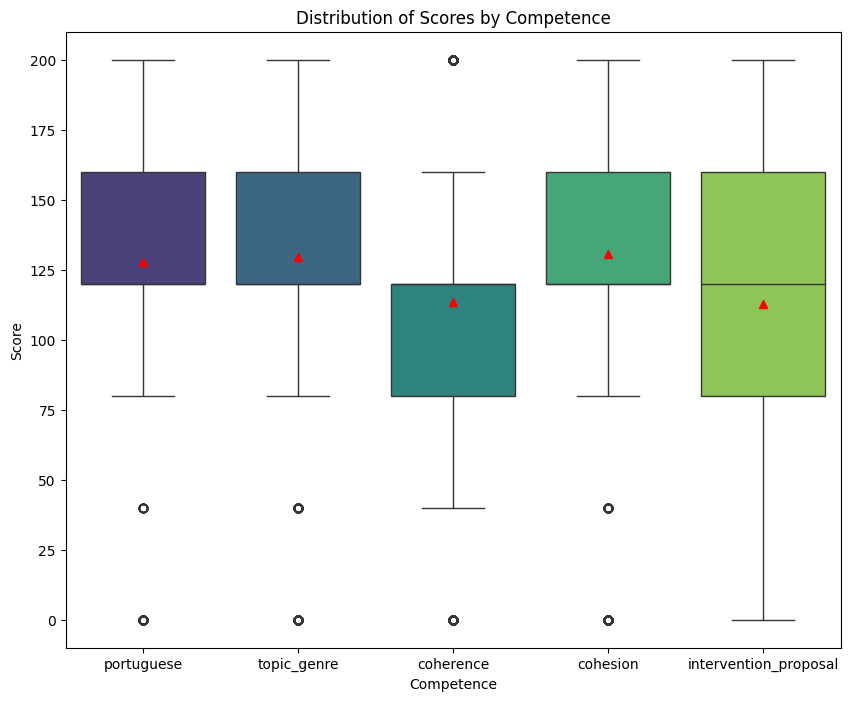

In [90]:
# Crie a grade de boxplots
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[competences], palette='viridis', showmeans=True, meanprops={'markerfacecolor':'red', 'markeredgecolor':'red'})
plt.title('Distribution of Scores by Competence')
plt.xlabel('Competence')
plt.ylabel('Score')

plt.show()

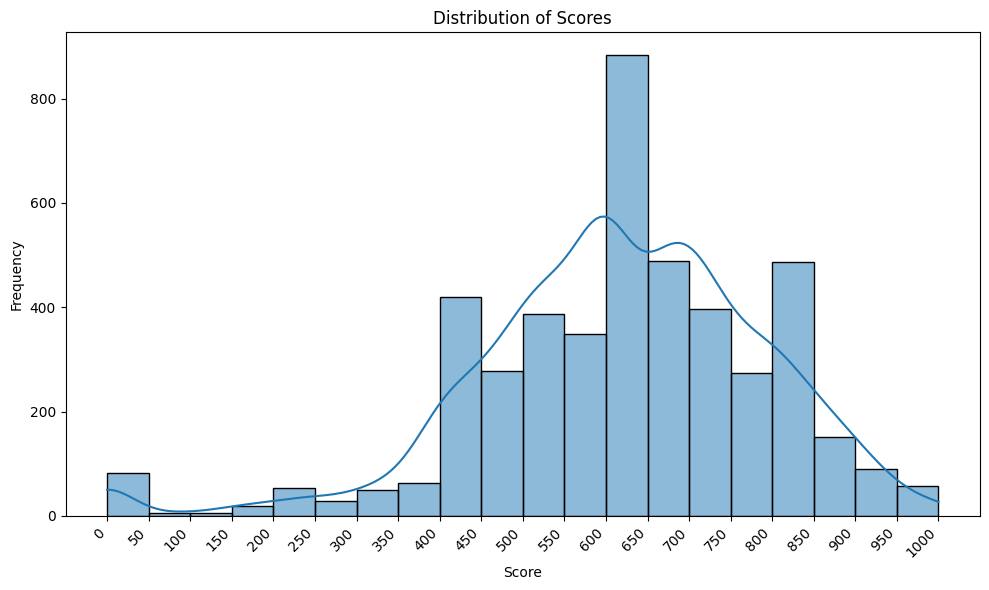

In [64]:
# Plote o histograma dos scores
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True)  # Defina os bins manualmente
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Defina os ticks manualmente
plt.xticks(range(0, 1050, 50), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [73]:
df['essay'][1]

['Pode -se afirmar que a presença dos Jesuítas, trouxe a aprendizagem, assim sendo à alfabetização dos índios . Atualmente a educação, ocorre em ensino regular, embora muitos chegam ao ensino superior incapazes de interpretar textos e cálculos matemáticos.',
 'Em primeiro lugar Padre Antônio Vieira`` A boa educação é a moeda de Ouro. Em toda parte, tem valor, ´sabe- que a precariedade educacional, levam os discentes a não interagir com a leitura, entretanto muitos docentes preocupam em cumprir os currículos e levam adiante a negligência.',
 'Em segundo lugar os recursos de tecnologia,\xa0 não utilizados de forma eficaz levam aos cidadãos à lentidão ao analfabetismo funcional , entretanto está ineficiência deixa as políticas econômicas a repensar sobre as necessidades.',
 'Por fim, segundo o IBG Instituto Brasileiro Geográfico este número de pessoas sem instrução formal tem sido diminuindo em XXI, por outro lado a população estão adquirindo seus conhecimentos em uma democracia da socied

3. Fazer anotações de suas suposições e dúvidas quanto ao problema;
4. Esboçar um plano de solução: frameworks, técnicas, features, algoritmos etc.;

In [81]:
train.head(3)

prompt                                              title  \
0      60                             Reforma da previdência   
1      51                          ANALFABETISMO E SOCIEDADE   
2      73  Caminhos para superar os desafios encontrados ...   

                                               essay              competence  \
0  [É notório que a reforma da previdência no Bra...  [120, 80, 80, 120, 40]   
1  [Pode -se afirmar que a presença dos Jesuítas,...  [120, 120, 80, 80, 80]   
2  [Em 13 de maio de 1888 veio ao Brasil a lei da...   [120, 80, 80, 80, 80]   

   score  
0    440  
1    480  
2    440